## Vertices of a rectangle

In [16]:
# This code computes the vertices of a rectangle given a normal vector to the plane and one point on the plane

import numpy as np

# Define the normal vector and a point on the plane
normal = np.array([1, 0, 0])
point_on_plane = np.array([0, 0, 0])

# Normalize the normal vector
normal = normal / np.linalg.norm(normal)

# Compute two orthogonal vectors that lie on the plane
v1 = np.array([0, 1, 0])
v2 = np.cross(normal, v1)
v2 /= np.linalg.norm(v2)
v1 = np.cross(v2, normal)

# Define the length and width of the rectangle
length = 2
width = 1

# Compute the half-length and half-width
half_length = length / 2
half_width = width / 2

# Compute the center point of the rectangle
center = point_on_plane + half_length * v1 + half_width * v2

# Compute the vertices of the rectangle
vertex1 = center + half_length * v1 + half_width * v2
vertex2 = center + half_length * v1 - half_width * v2
vertex3 = center - half_length * v1 - half_width * v2
vertex4 = center - half_length * v1 + half_width * v2

print(vertex1, vertex2, vertex3, vertex4)


[0. 2. 1.] [0. 2. 0.] [0. 0. 0.] [0. 0. 1.]


## Discretization

In [17]:
import numpy as np

# Define the size of the continuous plane
width = 10
height = 10

# Define the size of the grid of cells
n_cells_x = 5
n_cells_y = 5

# Compute the size of each cell
cell_size_x = width / n_cells_x
cell_size_y = height / n_cells_y

# Create a grid of cell centers
cell_centers_x = np.linspace(cell_size_x/2, width-cell_size_x/2, n_cells_x)
cell_centers_y = np.linspace(cell_size_y/2, height-cell_size_y/2, n_cells_y)
cell_centers = np.meshgrid(cell_centers_x, cell_centers_y)
cell_centers = np.stack(cell_centers, axis=-1)

# Display the cell centers
print(cell_centers)


[[[1. 1.]
  [3. 1.]
  [5. 1.]
  [7. 1.]
  [9. 1.]]

 [[1. 3.]
  [3. 3.]
  [5. 3.]
  [7. 3.]
  [9. 3.]]

 [[1. 5.]
  [3. 5.]
  [5. 5.]
  [7. 5.]
  [9. 5.]]

 [[1. 7.]
  [3. 7.]
  [5. 7.]
  [7. 7.]
  [9. 7.]]

 [[1. 9.]
  [3. 9.]
  [5. 9.]
  [7. 9.]
  [9. 9.]]]


## Point inside of polygon

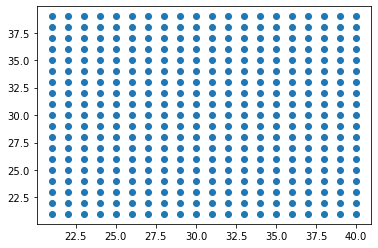

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def point_inside_polygon(x, y, poly):
    """Return True if the point x, y is inside the polygon defined by the list of vertices poly."""
    n = len(poly)
    inside = False

    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        x_inters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= x_inters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

# Define polygon vertices
poly_vertices = np.array([[20, 20], [20, 40], [40, 40], [40, 20]])

# Define meshgrid
x = np.arange(0, 60)
y = np.arange(0, 40)
xx, yy = np.meshgrid(x, y)

# Get points inside polygon
points_inside = []
for i in range(len(x)):
    for j in range(len(y)):
        if point_inside_polygon(xx[j,i], yy[j,i], poly_vertices):
            points_inside.append([xx[j,i], yy[j,i]])

points_inside = np.array(points_inside)
# print(points_inside)

plt.scatter(points_inside[:,0],points_inside[:,1])
plt.show()

## CODE FOR PROJECTIING A 2D MESHGRID POINT ONTO A 3D PLANE

In [19]:
import numpy as np

# Define intrinsic and extrinsic parameters of the camera
focal_length = 50
image_size = (640, 480)
principal_point = (320, 240)
camera_position = np.array([0, 0, 5])
camera_orientation = np.array([0, 0, 0])

# Define the 3D plane
plane_normal = np.array([0, 0, 1])
plane_point = np.array([0, 0, 0])

# Compute the projection matrix
K = np.array([[focal_length, 0, principal_point[0]], [0, focal_length, principal_point[1]], [0, 0, 1]])
R = np.eye(3)
t = -np.dot(R, camera_position)
P = np.dot(K, np.hstack((R, t.reshape(3,1))))

# Generate 2D meshgrid
x_range = np.linspace(0, image_size[0], num=image_size[0])
y_range = np.linspace(0, image_size[1], num=image_size[1])
X, Y = np.meshgrid(x_range, y_range)

# Project 2D meshgrid onto 3D plane
points_2d = np.vstack((X.flatten(), Y.flatten(), np.ones(X.size)))
points_3d = np.dot(np.linalg.inv(P), points_2d)
t = -(plane_normal.dot(plane_point))
d = (plane_normal.dot(points_3d) + t) / plane_normal.dot(plane_normal)
points_3d_on_plane = points_3d - d*np.vstack((plane_normal, plane_normal, plane_normal))

# Plot 3D points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_on_plane[0], points_3d_on_plane[1], points_3d_on_plane[2])
plt.show()


LinAlgError: Last 2 dimensions of the array must be square

## Intersection between a plane and a line

In [ ]:
import numpy as np

# Define the plane using 4 points
p1 = np.array([0, 0, 0])
p2 = np.array([2, 0, 0])
p3 = np.array([2, 0, 2])
p4 = np.array([0, 0, 2])

n = np.cross(p2-p1, p3-p1)  # Compute normal vector of the plane

# Define the line using two points
q1 = np.array([1, 2, 1])
q2 = np.array([1, 1, 1])

d = q2 - q1  # Compute direction vector of the line

# Compute scalar parameter t
t = np.dot(n, p1 - q1) / np.dot(n, d)

# Compute intersection point
intersect = q1 + t * d

print("Intersection point:", intersect)


## Plot a rectangular parallelepiped

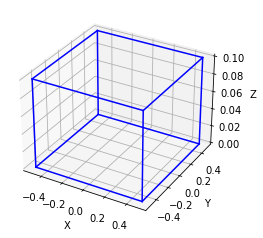

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 8 vertices of the rectangular parallelepiped
vertices = np.array([
    (-0.5, -0.5, 0), 
    (-0.5, 0.5, 0), 
    (0.5, 0.5, 0), 
    (0.5, -0.5, 0),     
    (-0.5, -0.5, 0.1),
    (-0.5, 0.5, 0.1),
    (0.5, 0.5, 0.1),
    (0.5, -0.5, 0.1)      
    ])

# Define the 12 edges of the rectangular parallelepiped
edges = np.array([(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 4), (1, 5), (2, 6), (3, 7)])

# Plot the rectangular parallelepiped
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], 'blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()